# Character Interaction Graph

This tutorial covers a brief example of how to extract a character interaction graph from text. The text used here is Moby Dick by Herman Melville, which is freely available on Project Gutenberg.

Importing required libraries

In [1]:
import nltk
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
# import pygraphviz

Downloading the Project Gutenberg and Stopwords corpus provided by NLTK

In [2]:
nltk.download('gutenberg')
nltk.download('stopwords')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Checking what books from Project Gutenberg are already available on NLTK

While Project Gutenberg has over 60000+ e-books that are free to access, the gutenberg corpus provided by NLTK has 18 books and plays available in the .txt format

Extracting the raw text for Herman Melville's Moby Dick

In [3]:
with open("The DaVinci Code by Brown, Dan (z-lib.org).mobi.txt",  'r', encoding='utf8' ) as f:
    content = f.read()
print(content)


FACT:

The Priory of Sion—a European secret society founded in 1099—is a real organization. In 1975

Paris's Bibliothèque Nationale discovered parchments known as Les Dossiers Secrets, identifying numerous members of the Priory of Sion, including Sir Isaac Newton, Botticelli, Victor Hugo, and Leonardo da Vinci.

The Vatican prelature known as Opus Dei is a deeply devout Catholic sect that has been the topic of recent controversy due to reports of brainwashing, coercion, and a dangerous practice known as

"corporal mortification." Opus Dei has just completed construction of a $47 million World Headquarters at 243 Lexington Avenue in New York City.

All descriptions of artwork, architecture, documents, and secret rituals in this novel are accurate.



Prologue

Louvre Museum, Paris 10:46 P.M.

Renowned curator Jacques Saunière staggered through the vaulted archway of the museum's Grand Gallery. He lunged for the nearest painting he could see, a Caravaggio. Grabbing the gilded frame, the

List out the characters in the book

Here, the list of characters is taken from the [Sparknotes](https://www.sparknotes.com/lit/mobydick/characters/) page. The adjacency matrix is created based on the co-occurrence of these characters in the same sentence.

In [4]:
characters = ['Vittoria Vetra', 'André Vernet', 'Leigh Teabing', 'Silas', 'Jacques Saunière', 'Sophie Neveu', \
            'Rémy Legaludec', 'Robert Langdon', 'Claude Grouard', \
            'Pamela Gettum', 'Jonas Faukman', 'Bezu Fache', 'Simon Edwards', 'Jerome Collet', 'Marie Chauvel', 'Sister Sandrine Bieil', 'Manuel Aringarosa']

In [5]:
print(len(characters))

17


17 characters.

Preprocessing the spaces between the names of characters

In [6]:
'''davinci = ""
for i in characters:
    if '_' in i:
        s = ' '.join(i.split('_'))
        
        content = content.replace(s,i)
'''

sentences = sent_tokenize(content)
(sentences)


['\nFACT:\n\nThe Priory of Sion—a European secret society founded in 1099—is a real organization.',
 "In 1975\n\nParis's Bibliothèque Nationale discovered parchments known as Les Dossiers Secrets, identifying numerous members of the Priory of Sion, including Sir Isaac Newton, Botticelli, Victor Hugo, and Leonardo da Vinci.",
 'The Vatican prelature known as Opus Dei is a deeply devout Catholic sect that has been the topic of recent controversy due to reports of brainwashing, coercion, and a dangerous practice known as\n\n"corporal mortification."',
 'Opus Dei has just completed construction of a $47 million World Headquarters at 243 Lexington Avenue in New York City.',
 'All descriptions of artwork, architecture, documents, and secret rituals in this novel are accurate.',
 'Prologue\n\nLouvre Museum, Paris 10:46 P.M.',
 "Renowned curator Jacques Saunière staggered through the vaulted archway of the museum's Grand Gallery.",
 'He lunged for the nearest painting he could see, a Caravaggi

In [7]:
count = 0
chapters = []
for sent in sentences:
    if ("CHAPTER" in sent and sent[0] == 'C') or "Epilogue" in sent or "CHAPTER 42" in sent:
        sentences.remove(sent)
        count+=1
    elif 'Dan Brown' in sent:
        sentences.remove(sent)
    elif 'Robert-Langdon' in sent:
        sent.replace('Robert-Langdon','Robert Langdon')

print(len(sentences))

12642


Once the text is preprocessed, it is converted into an adjacency matrix, stored as a pandas DataFrame

In [8]:
char_df = pd.DataFrame(0, index=characters, columns=characters)
char_df.head()

,Vittoria Vetra,André Vernet,Leigh Teabing,Silas,Jacques Saunière,Sophie Neveu,Rémy Legaludec,Robert Langdon,Claude Grouard,Pamela Gettum,Jonas Faukman,Bezu Fache,Simon Edwards,Jerome Collet,Marie Chauvel,Sister Sandrine Bieil,Manuel Aringarosa
Vittoria Vetra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
André Vernet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Leigh Teabing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Silas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Jacques Saunière,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
for sentence in sentences:
    for char1 in characters:
        s1 = char1.split(' ')
        if len(s1)==1:
            s1+=[s1[0]]
        for char2 in characters:
            s2 = char2.split(' ')
            if len(s2)==1:
                s2+=[s2[0]]
            if (char1 != char2):
                if s1[0] in sentence and s2[0] in sentence:
                    #print('c1: ',sentence)
                    char_df[char1][char2] += 1
                elif s1[0] in sentence and s2[1] in sentence:
                    #print('c2: ',sentence)
                    char_df[char1][char2] += 1
                elif s1[1] in sentence and s2[0] in sentence:
                    #print('c3: ',sentence)
                    char_df[char1][char2] += 1
                elif s1[1] in sentence and s2[1] in sentence:
                    #print('c4: ',sentence)
                    char_df[char1][char2] += 1


#char_df.head()

Creating a NetworkX graph from the adjacency matrix

In [10]:
G = nx.Graph()
G = nx.from_pandas_adjacency(char_df)

# for i in range(len(characters)):
#     for j in range(i+1, len(characters)):
#         char1 = characters[i]
#         char2 = characters[j]
#         if G.has_edge(char1, char2):
#             G[char1][char2]['interactions'] = char_df[char1][char2]

Printing nodes and edges in graph

In [11]:
print("Number of nodes in the graph:", len(G.nodes()))
print("Nodes:", G.nodes())
print()
print("Number of edges in the graph:", len(G.edges()))
print("Edges:", G.edges(data=True))

Number of nodes in the graph: 17
Nodes: ['Vittoria Vetra', 'André Vernet', 'Leigh Teabing', 'Silas', 'Jacques Saunière', 'Sophie Neveu', 'Rémy Legaludec', 'Robert Langdon', 'Claude Grouard', 'Pamela Gettum', 'Jonas Faukman', 'Bezu Fache', 'Simon Edwards', 'Jerome Collet', 'Marie Chauvel', 'Sister Sandrine Bieil', 'Manuel Aringarosa']

Number of edges in the graph: 46
Edges: [('Vittoria Vetra', 'Robert Langdon', {'weight': 2}), ('André Vernet', 'Jacques Saunière', {'weight': 4}), ('André Vernet', 'Sophie Neveu', {'weight': 9}), ('André Vernet', 'Robert Langdon', {'weight': 14}), ('André Vernet', 'Bezu Fache', {'weight': 2}), ('André Vernet', 'Jerome Collet', {'weight': 1}), ('Leigh Teabing', 'Silas', {'weight': 5}), ('Leigh Teabing', 'Jacques Saunière', {'weight': 5}), ('Leigh Teabing', 'Sophie Neveu', {'weight': 73}), ('Leigh Teabing', 'Rémy Legaludec', {'weight': 28}), ('Leigh Teabing', 'Robert Langdon', {'weight': 115}), ('Leigh Teabing', 'Bezu Fache', {'weight': 8}), ('Leigh Teabing

Plotting the graph

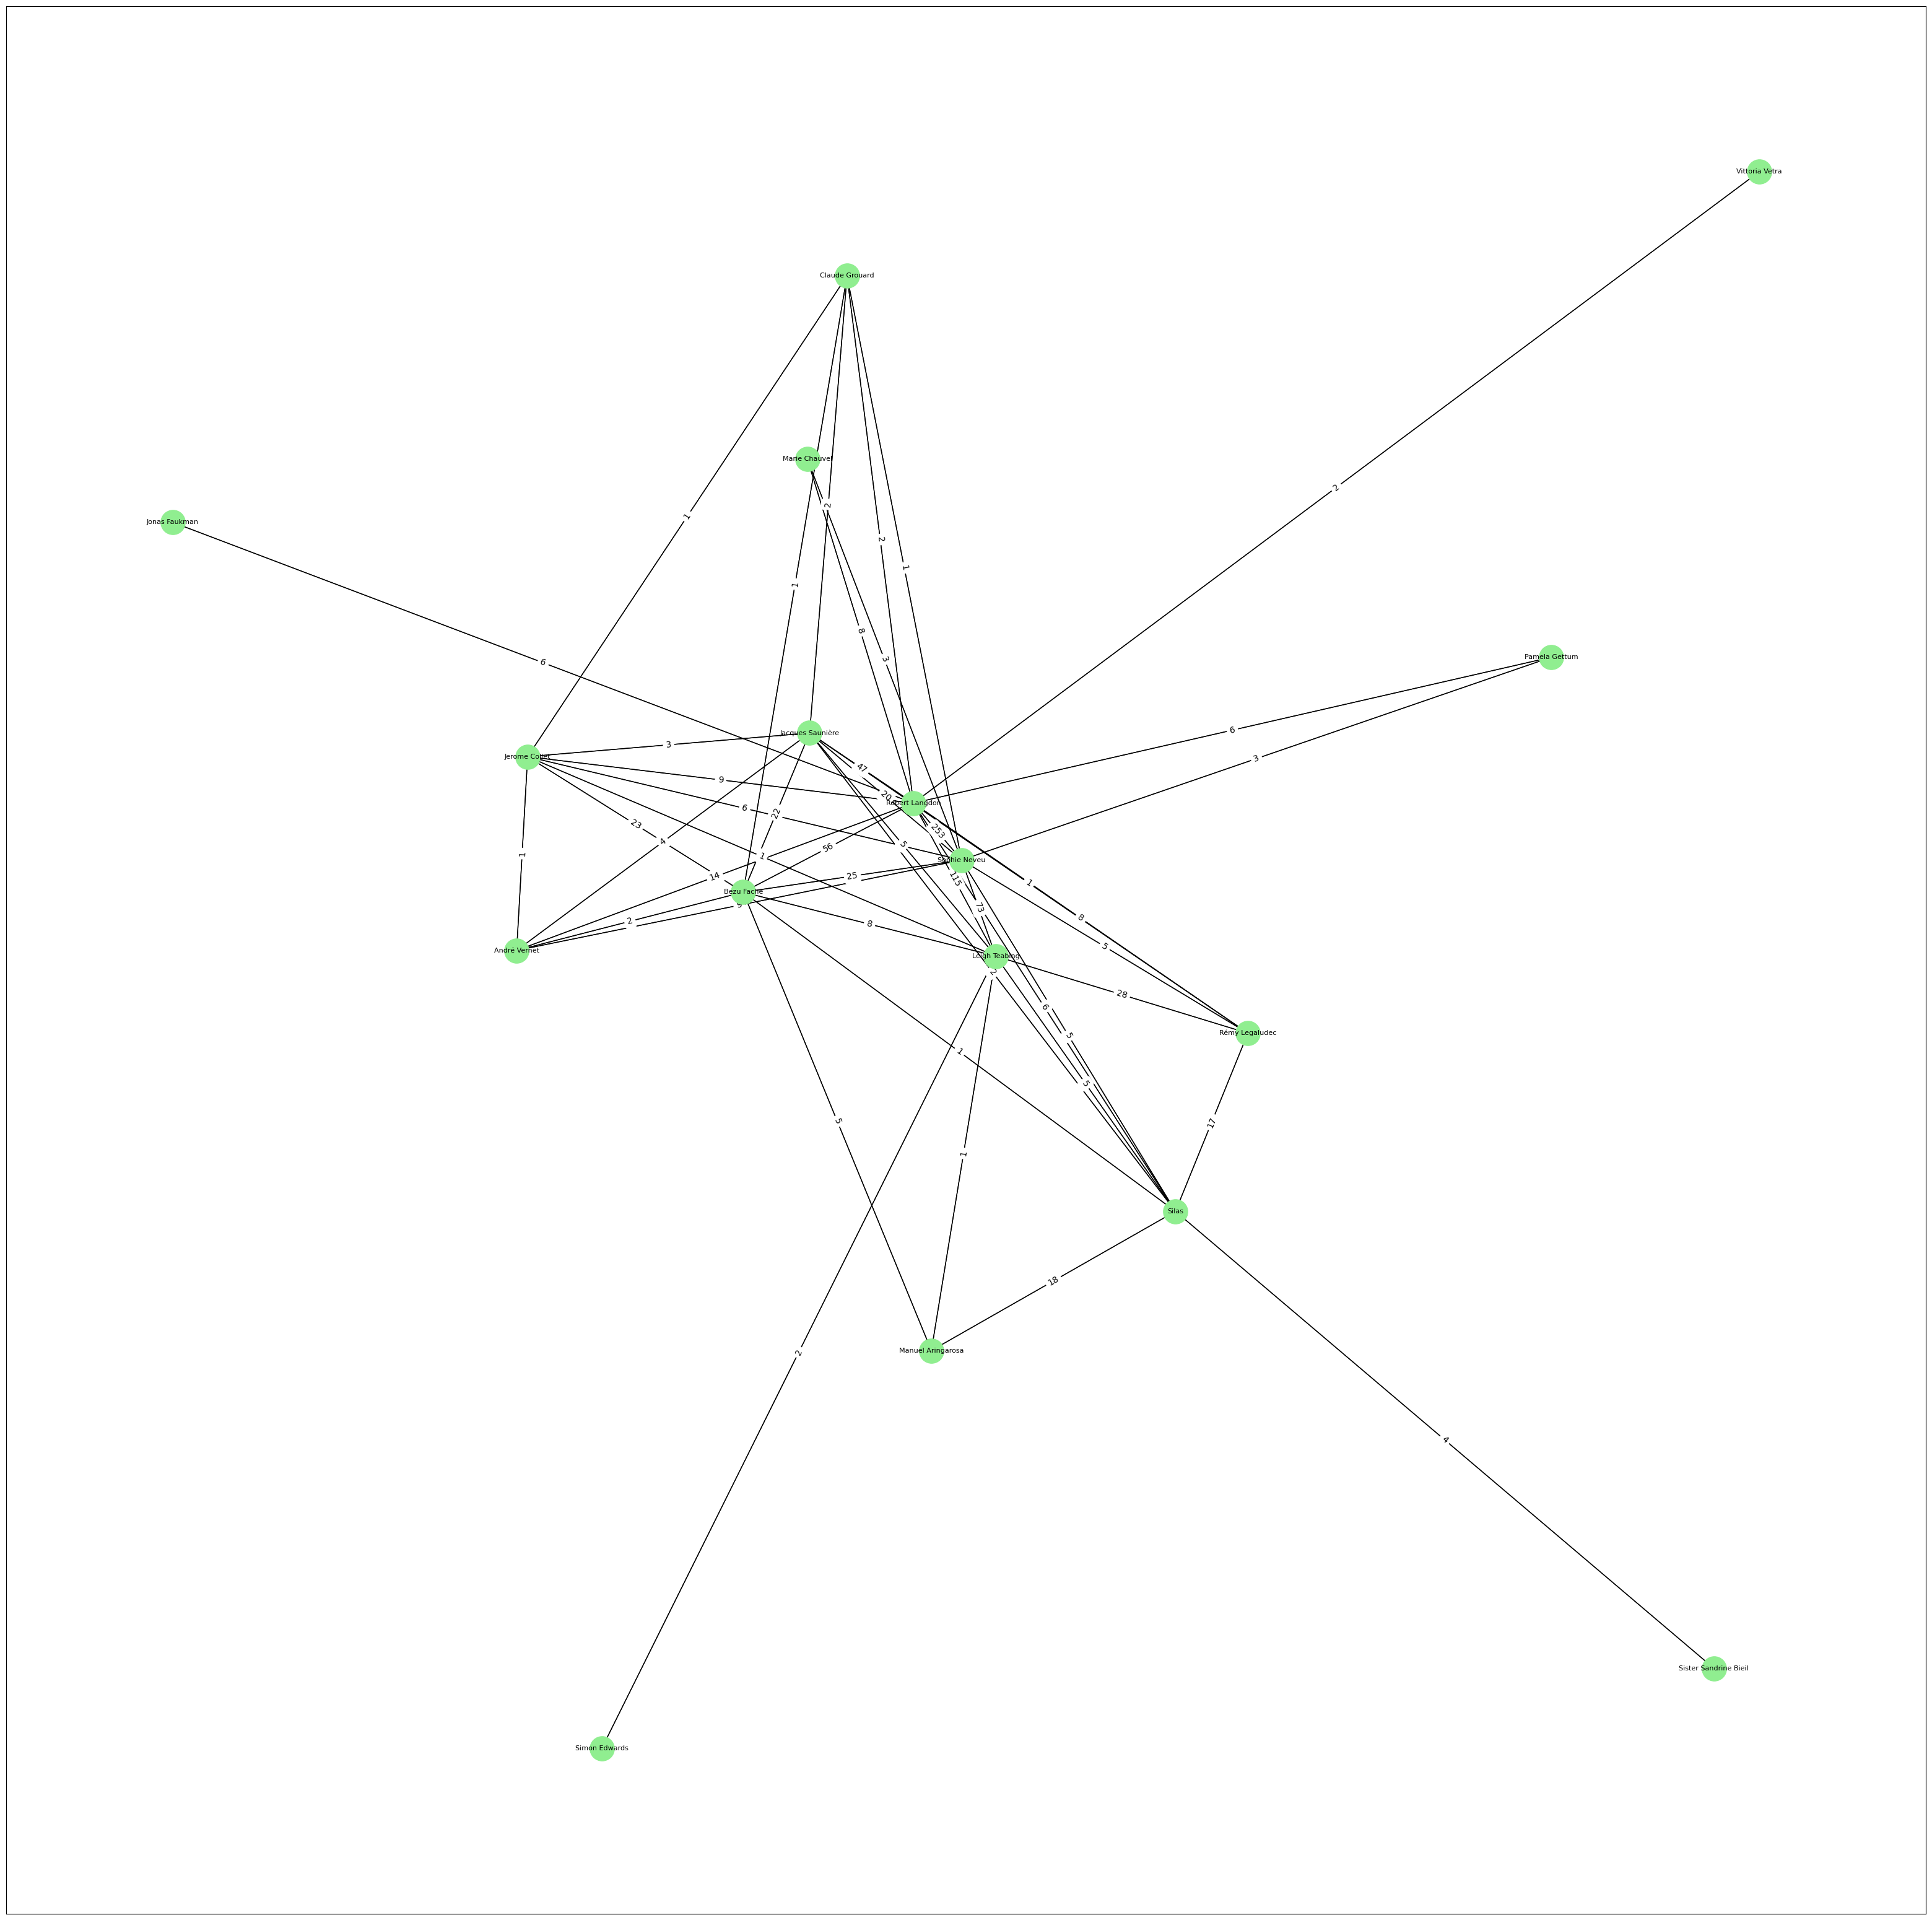

In [12]:
plt.figure(3, figsize=(40,40))
pos = nx.fruchterman_reingold_layout(G)

nx.draw_networkx(G, pos=pos, node_size = 800, font_size=8, node_color="lightgreen")
nx.draw_networkx_edges(G, pos=pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

In [13]:
from operator import itemgetter

In [14]:
degc = nx.degree_centrality(G)
# let's list the scores
sorted(degc.items(), key=itemgetter(1), reverse=True)

[('Robert Langdon', 0.8125),
 ('Sophie Neveu', 0.6875),
 ('Leigh Teabing', 0.5625),
 ('Jacques Saunière', 0.5625),
 ('Bezu Fache', 0.5625),
 ('Silas', 0.5),
 ('Jerome Collet', 0.4375),
 ('André Vernet', 0.3125),
 ('Rémy Legaludec', 0.3125),
 ('Claude Grouard', 0.3125),
 ('Manuel Aringarosa', 0.1875),
 ('Pamela Gettum', 0.125),
 ('Marie Chauvel', 0.125),
 ('Vittoria Vetra', 0.0625),
 ('Jonas Faukman', 0.0625),
 ('Simon Edwards', 0.0625),
 ('Sister Sandrine Bieil', 0.0625)]

In [15]:
bet = nx.betweenness_centrality(G)
# let's list the scores
sorted(bet.items(), key=itemgetter(1), reverse=True)

[('Robert Langdon', 0.3668055555555556),
 ('Leigh Teabing', 0.15986111111111115),
 ('Silas', 0.1502777777777778),
 ('Sophie Neveu', 0.12513888888888888),
 ('Bezu Fache', 0.06027777777777777),
 ('Jacques Saunière', 0.029305555555555557),
 ('Jerome Collet', 0.008333333333333333),
 ('Vittoria Vetra', 0.0),
 ('André Vernet', 0.0),
 ('Rémy Legaludec', 0.0),
 ('Claude Grouard', 0.0),
 ('Pamela Gettum', 0.0),
 ('Jonas Faukman', 0.0),
 ('Simon Edwards', 0.0),
 ('Marie Chauvel', 0.0),
 ('Sister Sandrine Bieil', 0.0),
 ('Manuel Aringarosa', 0.0)]

In [16]:
clos = nx.closeness_centrality(G)
# let's list the scores
sorted(clos.items(), key=itemgetter(1), reverse=True)

[('Robert Langdon', 0.8421052631578947),
 ('Sophie Neveu', 0.7619047619047619),
 ('Leigh Teabing', 0.6956521739130435),
 ('Jacques Saunière', 0.6956521739130435),
 ('Bezu Fache', 0.6956521739130435),
 ('Silas', 0.6666666666666666),
 ('Jerome Collet', 0.6153846153846154),
 ('Rémy Legaludec', 0.5925925925925926),
 ('André Vernet', 0.5517241379310345),
 ('Claude Grouard', 0.5517241379310345),
 ('Pamela Gettum', 0.48484848484848486),
 ('Marie Chauvel', 0.48484848484848486),
 ('Manuel Aringarosa', 0.48484848484848486),
 ('Vittoria Vetra', 0.47058823529411764),
 ('Jonas Faukman', 0.47058823529411764),
 ('Simon Edwards', 0.42105263157894735),
 ('Sister Sandrine Bieil', 0.41025641025641024)]

In [17]:
from operator import itemgetter
s='\n sorted pagerank:\n'
print (s)
pgr=nx.pagerank(G)
print(sorted(pgr.items(), key=itemgetter(1), reverse=True))



 sorted pagerank:

[('Robert Langdon', 0.2773419169522005), ('Sophie Neveu', 0.2000073245646803), ('Leigh Teabing', 0.12714128862317373), ('Bezu Fache', 0.08002914436617228), ('Jacques Saunière', 0.060236730861040734), ('Silas', 0.05411174004114063), ('Rémy Legaludec', 0.04115527032724125), ('Jerome Collet', 0.030294864888309347), ('Manuel Aringarosa', 0.025929508049147676), ('André Vernet', 0.02229264869602489), ('Marie Chauvel', 0.013634044763624054), ('Pamela Gettum', 0.012747807367886343), ('Claude Grouard', 0.012158623839515761), ('Sister Sandrine Bieil', 0.011995405271682549), ('Jonas Faukman', 0.011482241598977849), ('Simon Edwards', 0.009731672981679717), ('Vittoria Vetra', 0.00970976680750242)]


In [18]:
print(nx.transitivity(G))

0.6


In [19]:
CC = nx.complete_graph(25)  #synthetic graph
nx.draw_networkx(CC,node_color='pink')

In [20]:
print(nx.clustering(CC))

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 1.0, 21: 1.0, 22: 1.0, 23: 1.0, 24: 1.0}


In [21]:
print(nx.average_clustering(CC))

1.0


In [22]:
!pip install community

  Created wheel for community: filename=community-1.0.0b1-py3-none-any.whl size=2153 sha256=18e602b2e3bd4df85b0a5786765ff38b7a85409bf92f25db025769512b3ca0ed
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\82\c4\04\d1a2e10b418aae6a1f7135eb20be8f2fb447d967f02f6afb3d
Successfully built community
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3


In [34]:
import community.community_louvain as community_louvain

In [35]:
nx.draw_networkx(G,with_labels=True, node_size=100,node_color='cyan')

In [36]:
from networkx.algorithms.community.centrality import girvan_newman
communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['André Vernet',
  'Bezu Fache',
  'Claude Grouard',
  'Jacques Saunière',
  'Jerome Collet',
  'Jonas Faukman',
  'Leigh Teabing',
  'Manuel Aringarosa',
  'Marie Chauvel',
  'Pamela Gettum',
  'Robert Langdon',
  'Rémy Legaludec',
  'Silas',
  'Sister Sandrine Bieil',
  'Sophie Neveu'],
 ['Simon Edwards'],
 ['Vittoria Vetra']]

In [31]:
!pip install python-louvain

  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9407 sha256=65fe6643a1ed7408742b1bf86154931087b9087082a23f5e661694ff33d5114d
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\af\40\91\ef3635f7d3ddbd889b5af9f1ac22b8d30c48d6f744cd74a6d1
Successfully built python-louvain


In [37]:
#first compute the best partition
part = community.community_louvain.best_partition(G)
print(part)

{'Vittoria Vetra': 2, 'André Vernet': 1, 'Leigh Teabing': 2, 'Silas': 0, 'Jacques Saunière': 1, 'Sophie Neveu': 2, 'Rémy Legaludec': 0, 'Robert Langdon': 2, 'Claude Grouard': 1, 'Pamela Gettum': 2, 'Jonas Faukman': 2, 'Bezu Fache': 1, 'Simon Edwards': 2, 'Jerome Collet': 1, 'Marie Chauvel': 2, 'Sister Sandrine Bieil': 0, 'Manuel Aringarosa': 0}


In [38]:
print(community_louvain.modularity(part, G))

0.11806367475895721


In [39]:
induced = community_louvain.induced_graph(part, G)
print(induced.nodes())
print(induced.edges())

[2, 1, 0]
[(2, 2), (2, 1), (2, 0), (1, 1), (1, 0), (0, 0)]


In [40]:
nx.draw_networkx(induced,node_color='cyan')

In [41]:
from networkx.algorithms.community import k_clique_communities  # find k-clique community using percolation method
c = list(k_clique_communities(G, 4))
print(c)

[frozenset({'Claude Grouard', 'Manuel Aringarosa', 'Jacques Saunière', 'Leigh Teabing', 'Rémy Legaludec', 'Robert Langdon', 'Jerome Collet', 'André Vernet', 'Bezu Fache', 'Silas', 'Sophie Neveu'})]


In [42]:
print(len(list(c)))


1


In [43]:
list(c)

[frozenset({'André Vernet',
            'Bezu Fache',
            'Claude Grouard',
            'Jacques Saunière',
            'Jerome Collet',
            'Leigh Teabing',
            'Manuel Aringarosa',
            'Robert Langdon',
            'Rémy Legaludec',
            'Silas',
            'Sophie Neveu'})]

### Shortest Path

In [54]:
source = 'Leigh Teabing'
target = 'André Vernet'
nx.shortest_path(G, source, target)

['Leigh Teabing', 'Jacques Saunière', 'André Vernet']

In [55]:
# Shortest paths are not unique
list(nx.all_shortest_paths(G, source, target))

[['Leigh Teabing', 'Jacques Saunière', 'André Vernet'],
 ['Leigh Teabing', 'Sophie Neveu', 'André Vernet'],
 ['Leigh Teabing', 'Robert Langdon', 'André Vernet'],
 ['Leigh Teabing', 'Bezu Fache', 'André Vernet'],
 ['Leigh Teabing', 'Jerome Collet', 'André Vernet']]

In [56]:
#Highlithing shortest paths available from source to target
def plot_paths(G, paths):
    plt.figure(figsize=(12,12))
    pos = nx.fruchterman_reingold_layout(G)
    nx.draw_networkx_nodes(G, pos=pos, node_size=3000, node_color='yellow')
    nx.draw_networkx_labels(G, pos=pos, labels={n: n for n in G})
    # Draw edges
    nx.draw_networkx_edges(G, pos=pos)
    for path in paths:
        edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos=pos, edgelist=edges, edge_color='red', width=3)
    ax = plt.gca()
    ax.set_axis_off()
    ax.grid(None)

In [57]:
plot_paths(G, [nx.shortest_path(G, source, target)])

In [58]:
plot_paths(G, nx.all_shortest_paths(G, source, target))

### Fidning the Size of the Component

In [59]:
a = nx.is_connected(G)
s='\n Is a connected graph: ' +repr(a)
print (s)

no=len(list(nx.connected_components(G)))
s='\n no of connected components: ' +repr(no)
print (s)

#Gecum13ate a sorted list of connected components, largest first 
CoC=sorted(nx.connected_components(G), key = len, reverse=True)
for item in CoC:
    cclen=len(item)
    s= "\n Connected component length:" +repr(cclen)
    print (s)
    print ("\n Connected component :")
    print (item)



 Is a connected graph: True

 no of connected components: 1

 Connected component length:17

 Connected component :
{'Marie Chauvel', 'Claude Grouard', 'Sister Sandrine Bieil', 'Manuel Aringarosa', 'Jacques Saunière', 'Leigh Teabing', 'Rémy Legaludec', 'Vittoria Vetra', 'Robert Langdon', 'André Vernet', 'Pamela Gettum', 'Jonas Faukman', 'Jerome Collet', 'Bezu Fache', 'Silas', 'Sophie Neveu', 'Simon Edwards'}


In [60]:
list(nx.connected_components(G))

[{'André Vernet',
  'Bezu Fache',
  'Claude Grouard',
  'Jacques Saunière',
  'Jerome Collet',
  'Jonas Faukman',
  'Leigh Teabing',
  'Manuel Aringarosa',
  'Marie Chauvel',
  'Pamela Gettum',
  'Robert Langdon',
  'Rémy Legaludec',
  'Silas',
  'Simon Edwards',
  'Sister Sandrine Bieil',
  'Sophie Neveu',
  'Vittoria Vetra'}]

### Clique Percolation method : find community using 3 clique

In [61]:
from networkx.algorithms.community import k_clique_communities  # find k-clique community using percolation method
c = list(k_clique_communities(G, 3))
print(c)

[frozenset({'Manuel Aringarosa', 'Robert Langdon', 'Jerome Collet', 'André Vernet', 'Pamela Gettum', 'Bezu Fache', 'Jacques Saunière', 'Marie Chauvel', 'Claude Grouard', 'Leigh Teabing', 'Rémy Legaludec', 'Silas', 'Sophie Neveu'})]


In [65]:
print(list(c[0]))


['Manuel Aringarosa', 'Robert Langdon', 'Jerome Collet', 'André Vernet', 'Pamela Gettum', 'Bezu Fache', 'Jacques Saunière', 'Marie Chauvel', 'Claude Grouard', 'Leigh Teabing', 'Rémy Legaludec', 'Silas', 'Sophie Neveu']


In [66]:
from networkx.algorithms.community.centrality import girvan_newman
communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['André Vernet',
  'Bezu Fache',
  'Claude Grouard',
  'Jacques Saunière',
  'Jerome Collet',
  'Jonas Faukman',
  'Leigh Teabing',
  'Manuel Aringarosa',
  'Marie Chauvel',
  'Pamela Gettum',
  'Robert Langdon',
  'Rémy Legaludec',
  'Silas',
  'Sister Sandrine Bieil',
  'Sophie Neveu'],
 ['Simon Edwards'],
 ['Vittoria Vetra']]

In [67]:
N,K = G.order(), G.size()
avg_deg = float(K)/N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)


Nodes:  17
Edges:  46
Average degree:  2.7058823529411766


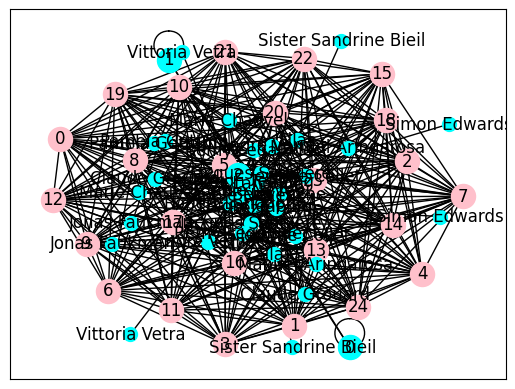

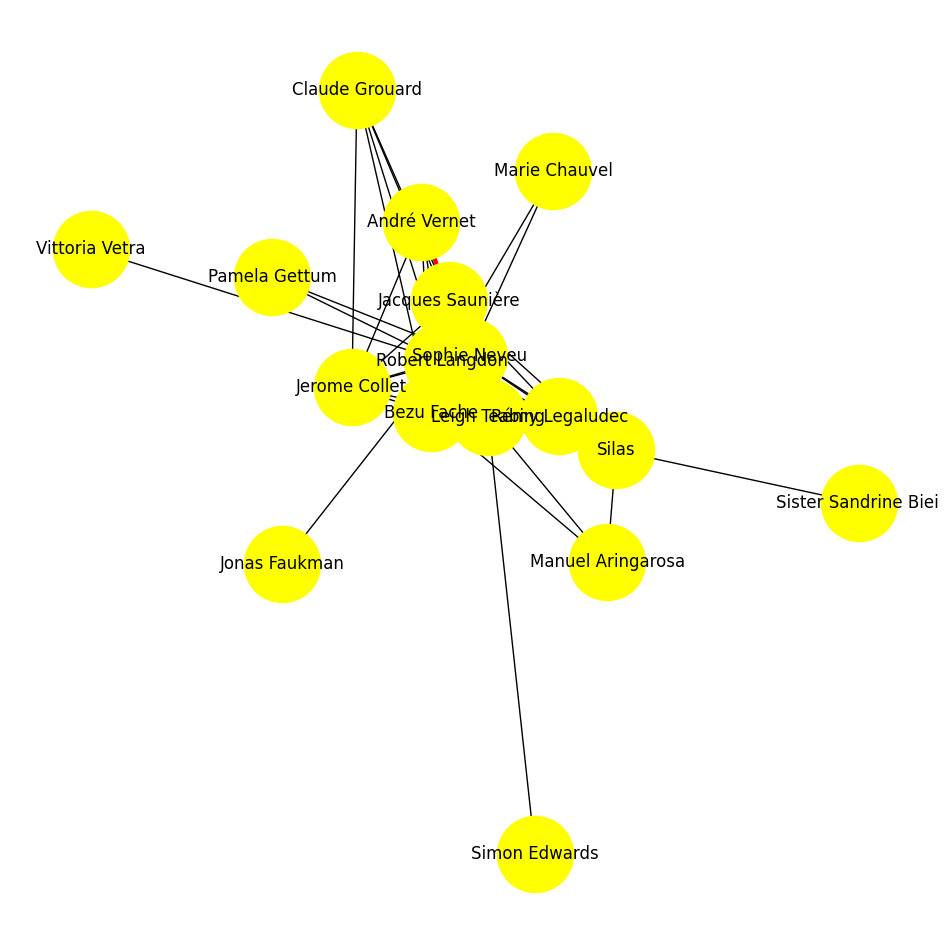

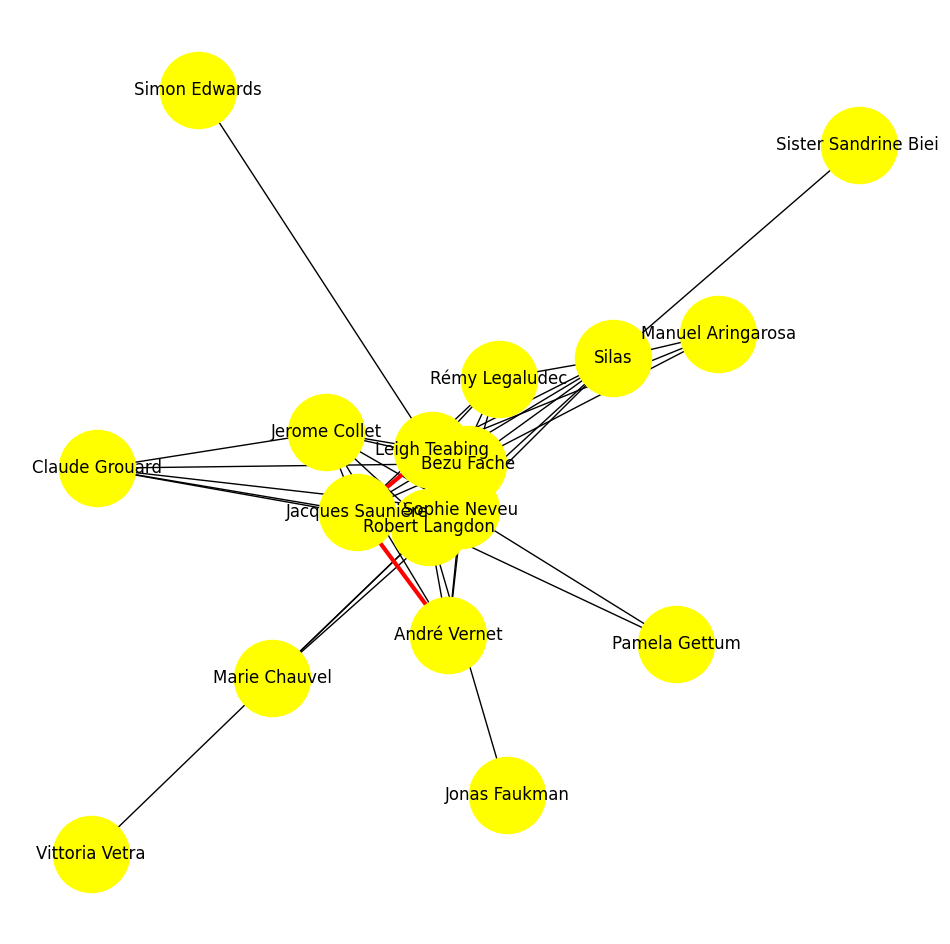

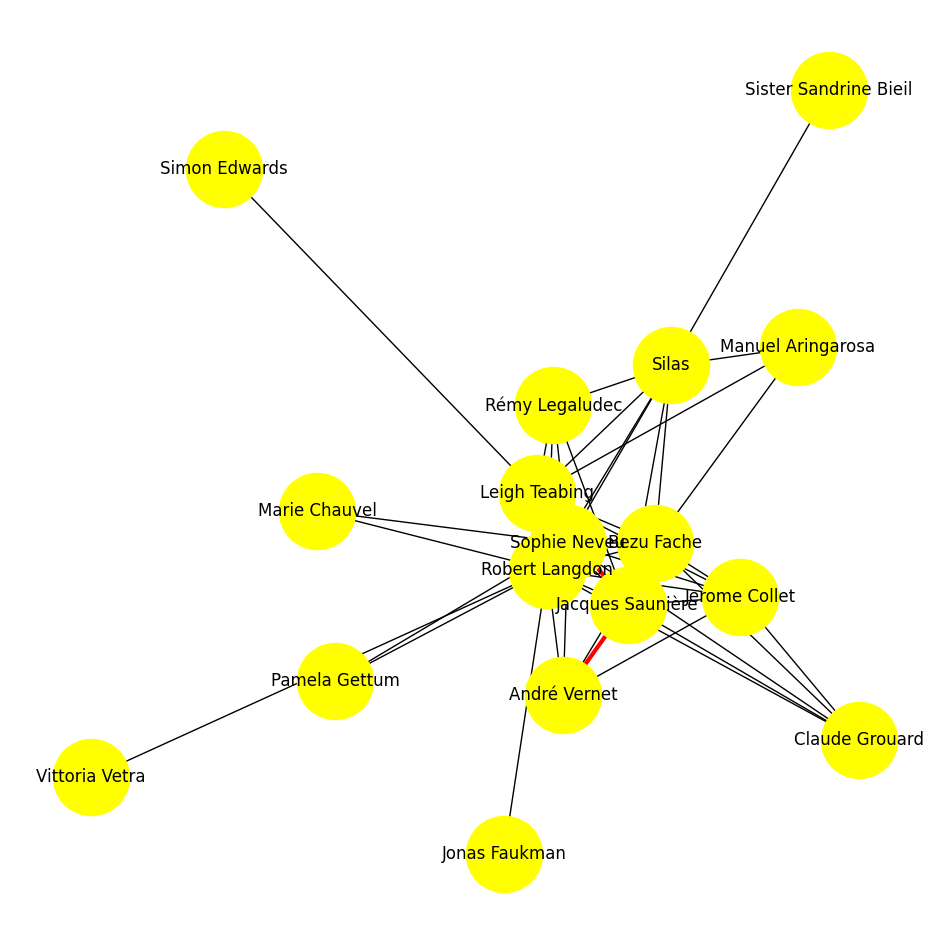

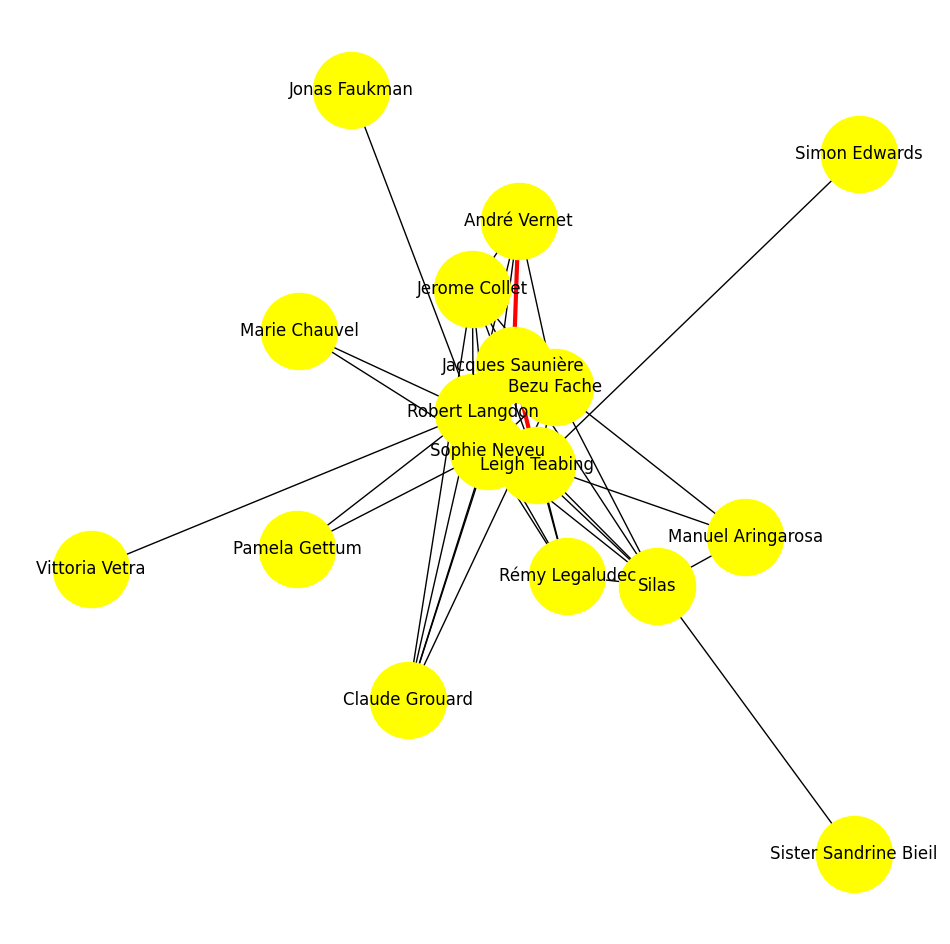

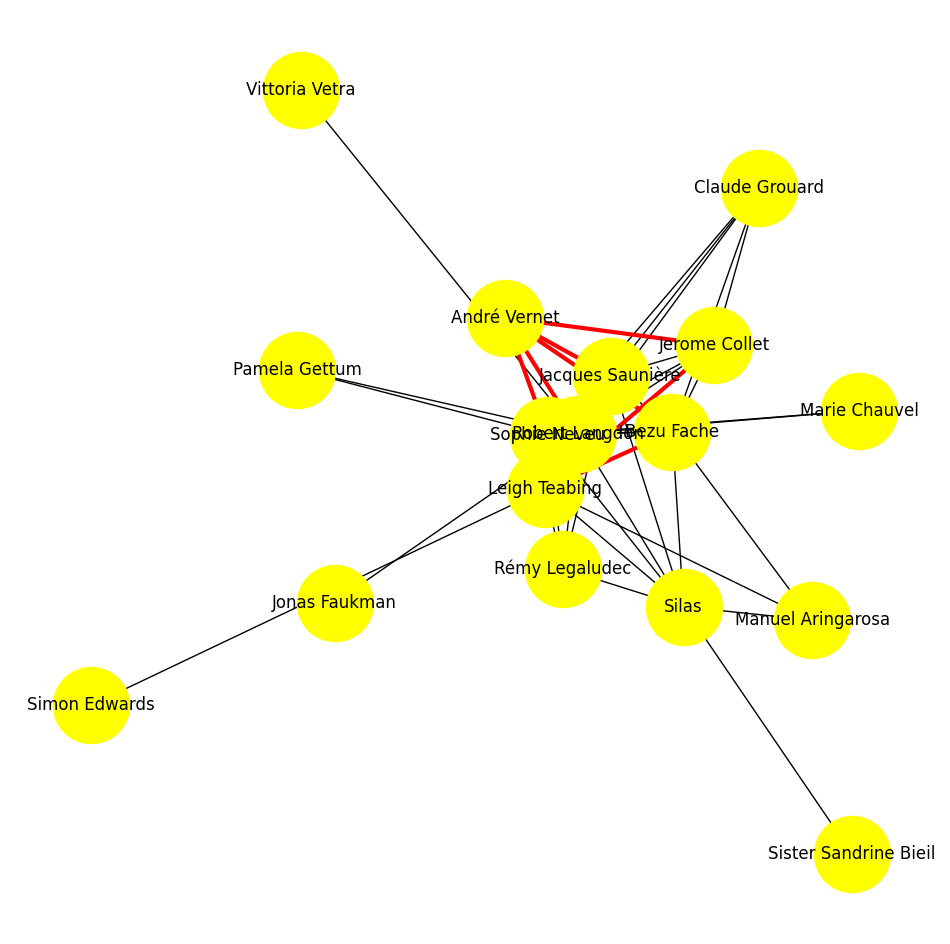

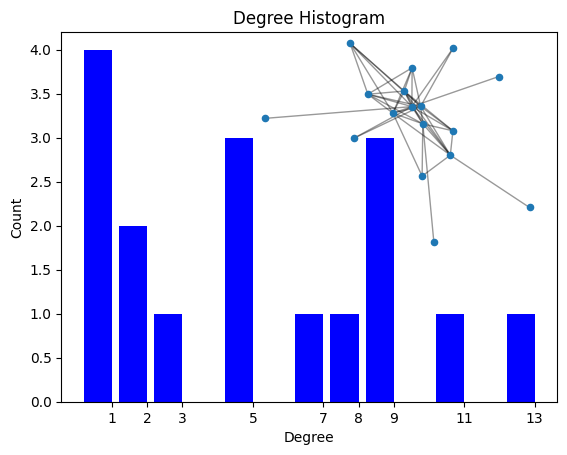

In [68]:
import collections

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
A = (G.subgraph(c) for c in nx.connected_components(G))
Gcc = sorted(A, key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

### Generative Models

In [69]:
nodes=G.number_of_nodes()
nodes

17

In [70]:
#calculate average degree to use with random graph models 

degree_list = list(nx.degree(G))
#print(degree_list)
no_nodes=len(degree_list)
total_degree=0
for node in degree_list[:5]:
    print("Node ", node[0], " : Degree is ", node[1])
    total_degree=total_degree+ node[1]
avg_degree= total_degree/no_nodes
avg_degree

Node  Vittoria Vetra  : Degree is  1
Node  André Vernet  : Degree is  5
Node  Leigh Teabing  : Degree is  9
Node  Silas  : Degree is  8
Node  Jacques Saunière  : Degree is  9


1.8823529411764706

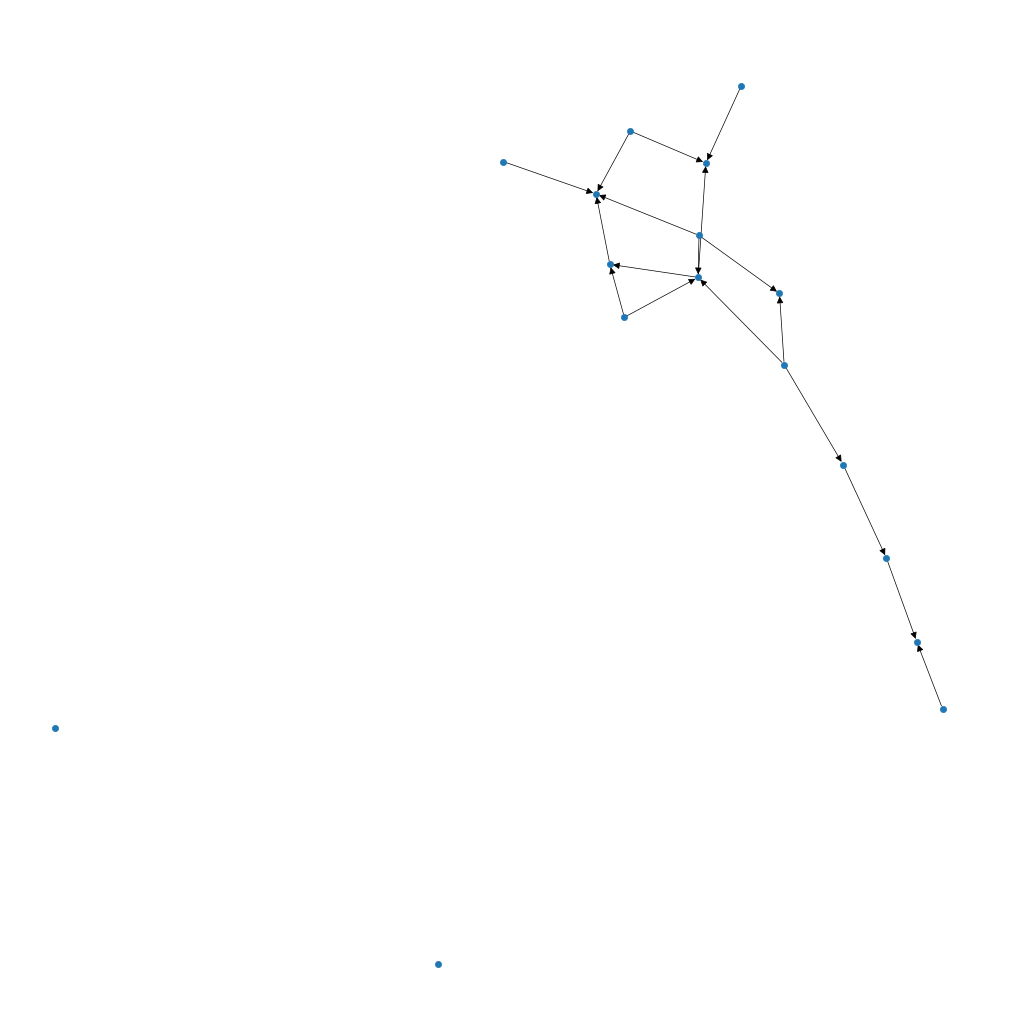

In [71]:
p=avg_degree/(no_nodes-1)
#G2 = nx.erdos_renyi_graph(no_nodes,p)  # same call 
G2 = nx.gnp_random_graph(no_nodes,p)
fig = plt.figure(figsize =(10 ,10))
nx.draw(G2, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()


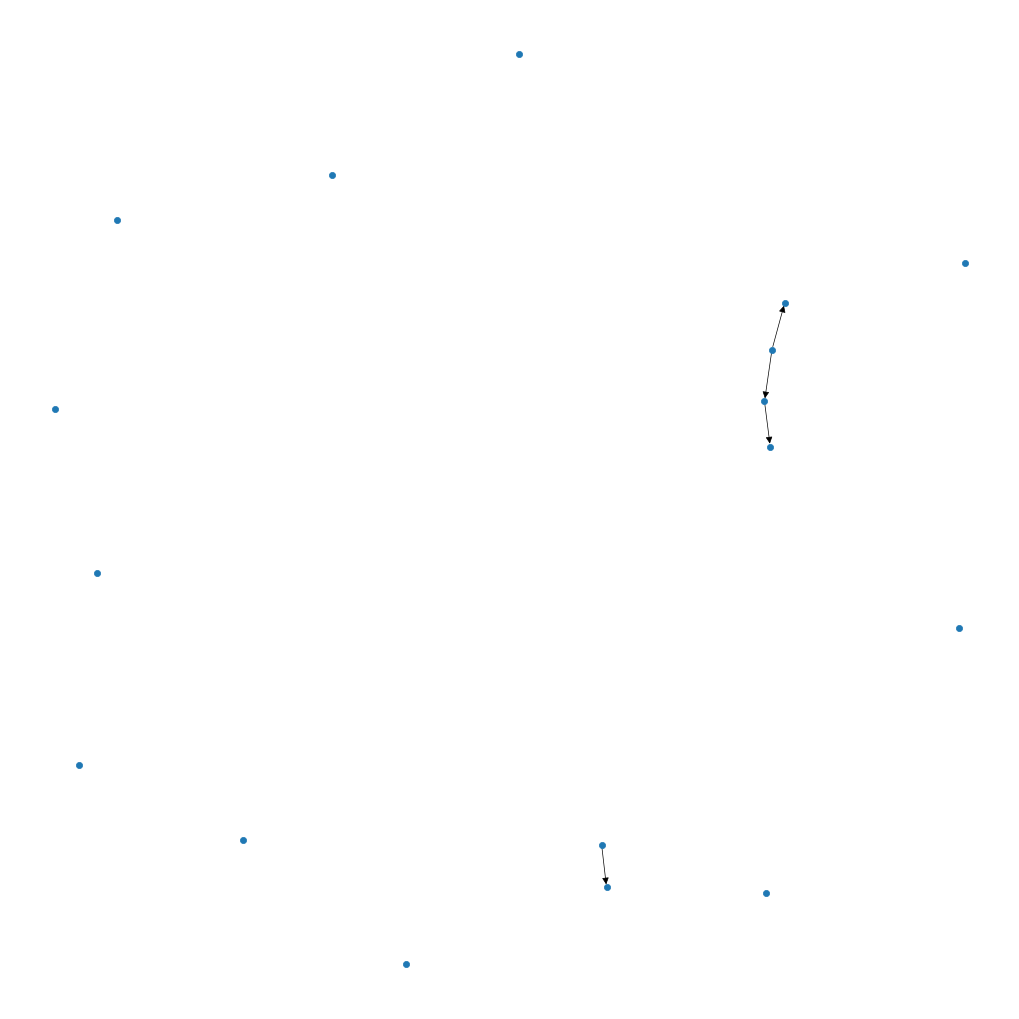

In [72]:
#Make random graph 
G2 = nx.gnp_random_graph(no_nodes,0.1)
#assuming probability for node creation 0.1 
fig = plt.figure(figsize =(10 ,10))
nx.draw(G2, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()

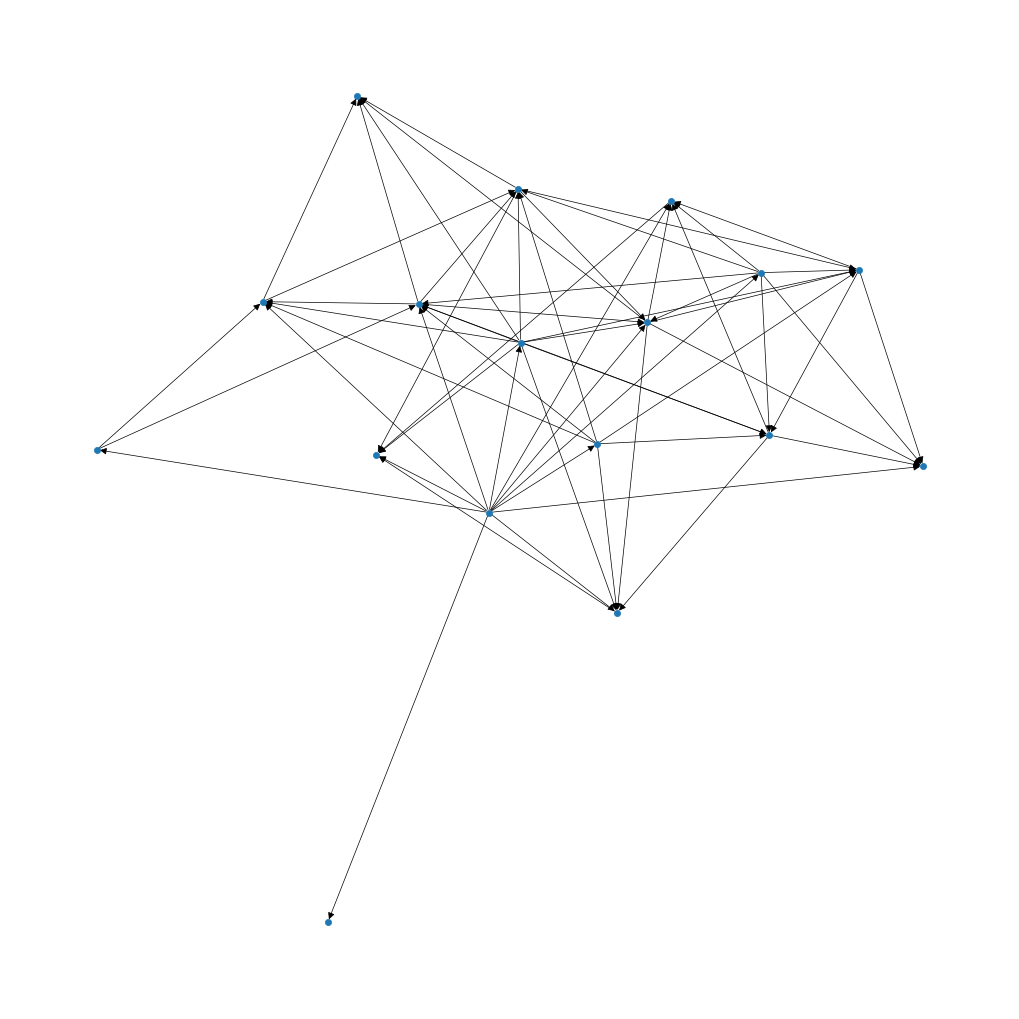

In [73]:
neighbours=5
H = nx.barabasi_albert_graph(no_nodes,neighbours)
fig = plt.figure(figsize =(10 ,10))
nx.draw(H, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()

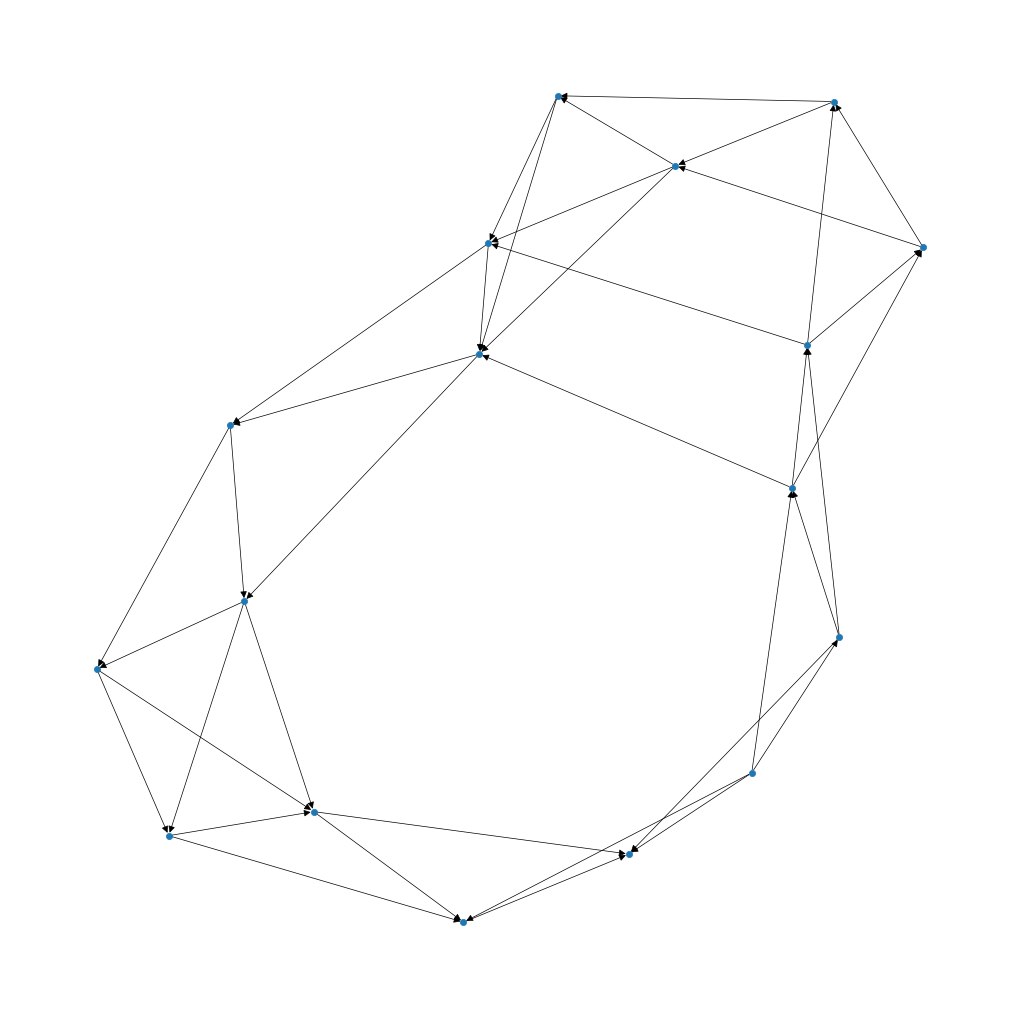

In [74]:
H = nx.newman_watts_strogatz_graph(no_nodes,neighbours,p)
fig = plt.figure(figsize =(10 ,10))

nx.draw(H, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()